# Начало работы

Для начала познакомимся с нашим инструментом: мы будем работать в Google Colab, подробнее о его возможностях можно узнать [здесь](https://colab.research.google.com/notebooks/intro.ipynb#). 

Давайте загрузим данные, сегодня мы будем работать с теми же данными, что и обычно ([Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)). 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
data = pd.read_csv("https://raw.githubusercontent.com/avmolotova/mpt/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f'Так, что тут у нас? Ага, {data.shape[0]} строчек и {data.shape[1]} колонок в датасете.') #*

Так, что тут у нас? Ага, 7043 строчек и 21 колонок в датасете.


*что такое `f` здесь? formatted string literals, с помощью них можно встроить { } с выражениями, которые могут считаться, например:
[справка](https://docs.python.org/3.6/reference/lexical_analysis.html#formatted-string-literals)

In [ ]:
print(f'сколько будет 2+2? получается {2+2}')

сколько будет 2+2? получается 4


Разбираемся с форматом данных!

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce') #if ‘coerce’, then invalid parsing will be set as NaN.
data.isnull().sum() #у нас 11 NA 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.SeniorCitizen = data.SeniorCitizen.astype(object)
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

# Correlation & plot



In [ ]:
  data.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [ ]:
churn_corr.index

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

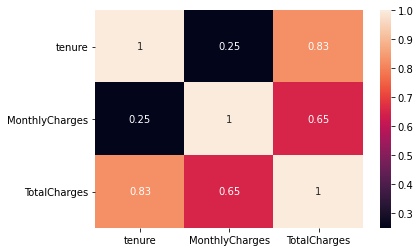

In [ ]:
import seaborn as sns

churn_corr = data.corr()
churn_corr_top = churn_corr.index
sns.heatmap(data[churn_corr_top].corr(), annot=True)

In [ ]:
# Compute correlation matrix: corr_mat
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
r = pearson_r(data.var1, data.var2)

# Print the result
print(r)

AttributeError: ignored

In [ ]:
scipy.stats.pearsonr()

NameError: ignored

# Chi-square

In [ ]:
# Create a table of cross-tabulations
table = pd.crosstab(data.var1,data.var2)
print(table)

# Perform the Fisher exact test
fisher = stats.fisher_exact(table, alternative='two-sided')
print(fisher)

# Is the result significant?
alpha = 0.05
if fisher[1] < alpha:
    print("Proportions  differ significantly")
else:
    print("No significant difference in proportions found")

AttributeError: ignored

# T-test

In [ ]:
# Create two arrays
array1 = data[data.cat_var == "Europe"].num_var
array2 = data[data.cat_var == "Asia"].num_var

# Perform the two-sample t-test
t_result= stats.ttest_ind(array1, array2)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("Europe and Asia have different mean values")
else: print("No significant difference found")

One-sample T-test

In [ ]:
Sample_A=[66.1, 69.8,67.7,69.6,71.1]
# Perform t-test and print result

t_result=stats.ttest_1samp(Sample_A, 65)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("mean value of Sample A differs from given value")
else:
	print("No significant difference found")
 
 #this sample isn't significantly different from 65 kg.


Ttest_1sampResult(statistic=4.397165403622582, pvalue=0.01171701570294137)
mean value of Sample A differs from given value


# Задание 1: Correlation

Переменные: tenure & MonthlyCharges

In [ ]:
# Build a function

# Compute correlation matrix: corr_mat
    corr_mat = __.__(__, __)

    # Return entry [0,1]
    ___ ___[0,1]

# Compute Pearson correlation coefficient for tenure and monthly charges
cor = __(__, __)

# Show the result
___(cor)

# Задание 2: Chi-square

Переменные: gender & Partner

In [ ]:
# Create a table of cross-tabulations
table = __.__(__,__)
print(table)

# Perform the Fisher exact test
fisher = __.__(__, alternative='two-sided')
print(fisher)

# Is the result significant?
alpha = __
if __ < alpha:
    print("Proportions differ significantly")
else:
    print("No significant difference in proportions  found")

# Задание 3: T-test

Переменные: gender & tenure

In [ ]:
# Create two arrays
male = __[__ == "Male"].__
female = __[__ == "Female"].__

# Perform the two-sample t-test
t_result= __.__(__, __)
print(t_result)

# Test significance
alpha= __
if (__ < alpha):
    print("Females and males have different mean tenure")
else: print("No significant difference found")

# LAMBDA

разобраться в этом нам помогло: 


1.   [объяснение](https://www.guru99.com/python-lambda-function.html) простыми словами 
2.   датакемп Python Data Science Toolbox, [3 глава](https://campus.datacamp.com/courses/python-data-science-toolbox-part-1/lambda-functions-and-error-handling?ex=1), первые шесть заданий



## простые примеры

In [ ]:
#лямбда для стрингов))
h = "Hello"
lmbd = lambda x: x + ", world!"
print(lmbd(h))

Hello, world!


In [ ]:
hh = 8
lbd = lambda x: x ** x
lbd(hh)

16777216

In [ ]:
#меп
hm = ["Hello", "Wake up", "Nevermind"] #создаем лист

lmbdm = map(lambda x: x + ", world!", hm) #идея: лямбда берет наш лист и с каждым элементом проделывает то, что мы говорим после :

print(lmbdm) #возвращается меп обджект, нам такое не подходит

list(lmbdm) #тогда превращаем в лист

['Hello, world!', 'Wake up, world!', 'Nevermind, world!']